In [155]:
#B1: đọc dữ liệu từ bridge_game.txt
import numpy as np
with open('convert_image_to_txt/bridge_game_6.txt', 'r') as f:
    data = f.read()
    data = data.split('\n')
    data = np.array(data)
    print(data.shape)
    print(data)

(14,)
['3...3...3...2...1.....' '..2......2...3.4..3..2'
 '.1..1..3...2..4.4...4.' '..3..1...2..3..4...2.3'
 '...3...5...2..2.2.3.3.' '3.2.....2.3....3.3.1..'
 '.2..2..4.2........2..6' '2..1........2.3..3..3.'
 '..3.5.2....3.4.....4.3' '.2.3.4.4..4...4...2...'
 '5.3...3..1..3...3..4..' '.2...3.3..3...2..3..3.'
 '4..2..3.3...6......2..' '.....3...4...4...4...3']


In [156]:
type(data.shape)

tuple

In [157]:
for i in range(len(data)):
    print(data[i])

3...3...3...2...1.....
..2......2...3.4..3..2
.1..1..3...2..4.4...4.
..3..1...2..3..4...2.3
...3...5...2..2.2.3.3.
3.2.....2.3....3.3.1..
.2..2..4.2........2..6
2..1........2.3..3..3.
..3.5.2....3.4.....4.3
.2.3.4.4..4...4...2...
5.3...3..1..3...3..4..
.2...3.3..3...2..3..3.
4..2..3.3...6......2..
.....3...4...4...4...3


In [158]:
sizeX = data.shape[0]
sizeY = len(data[0])
print(sizeX, sizeY)

14 22


In [159]:
#B2: tạo dictionary nodes
counter = 0
from model.node import Node
nodes = {}
#get id from position
position = {}
for i in range(sizeX):
    for j in range(sizeY):
        if data[i][j] != '.':
            nodes[counter] = Node(
                id = counter,
                goal_order= int(data[i][j]),
                x = i,
                y = j,
                potenial_neighbor_ids = [])
            position[(i,j)] = counter
            counter += 1
for key, value in nodes.items():
    print(value)

Node(id: 0, goal_order: 3, [],x= 0,y= 0)
Node(id: 1, goal_order: 3, [],x= 0,y= 4)
Node(id: 2, goal_order: 3, [],x= 0,y= 8)
Node(id: 3, goal_order: 2, [],x= 0,y= 12)
Node(id: 4, goal_order: 1, [],x= 0,y= 16)
Node(id: 5, goal_order: 2, [],x= 1,y= 2)
Node(id: 6, goal_order: 2, [],x= 1,y= 9)
Node(id: 7, goal_order: 3, [],x= 1,y= 13)
Node(id: 8, goal_order: 4, [],x= 1,y= 15)
Node(id: 9, goal_order: 3, [],x= 1,y= 18)
Node(id: 10, goal_order: 2, [],x= 1,y= 21)
Node(id: 11, goal_order: 1, [],x= 2,y= 1)
Node(id: 12, goal_order: 1, [],x= 2,y= 4)
Node(id: 13, goal_order: 3, [],x= 2,y= 7)
Node(id: 14, goal_order: 2, [],x= 2,y= 11)
Node(id: 15, goal_order: 4, [],x= 2,y= 14)
Node(id: 16, goal_order: 4, [],x= 2,y= 16)
Node(id: 17, goal_order: 4, [],x= 2,y= 20)
Node(id: 18, goal_order: 3, [],x= 3,y= 2)
Node(id: 19, goal_order: 1, [],x= 3,y= 5)
Node(id: 20, goal_order: 2, [],x= 3,y= 9)
Node(id: 21, goal_order: 3, [],x= 3,y= 12)
Node(id: 22, goal_order: 4, [],x= 3,y= 15)
Node(id: 23, goal_order: 2, [],x

In [160]:
position

{(0, 0): 0,
 (0, 4): 1,
 (0, 8): 2,
 (0, 12): 3,
 (0, 16): 4,
 (1, 2): 5,
 (1, 9): 6,
 (1, 13): 7,
 (1, 15): 8,
 (1, 18): 9,
 (1, 21): 10,
 (2, 1): 11,
 (2, 4): 12,
 (2, 7): 13,
 (2, 11): 14,
 (2, 14): 15,
 (2, 16): 16,
 (2, 20): 17,
 (3, 2): 18,
 (3, 5): 19,
 (3, 9): 20,
 (3, 12): 21,
 (3, 15): 22,
 (3, 19): 23,
 (3, 21): 24,
 (4, 3): 25,
 (4, 7): 26,
 (4, 11): 27,
 (4, 14): 28,
 (4, 16): 29,
 (4, 18): 30,
 (4, 20): 31,
 (5, 0): 32,
 (5, 2): 33,
 (5, 8): 34,
 (5, 10): 35,
 (5, 15): 36,
 (5, 17): 37,
 (5, 19): 38,
 (6, 1): 39,
 (6, 4): 40,
 (6, 7): 41,
 (6, 9): 42,
 (6, 18): 43,
 (6, 21): 44,
 (7, 0): 45,
 (7, 3): 46,
 (7, 12): 47,
 (7, 14): 48,
 (7, 17): 49,
 (7, 20): 50,
 (8, 2): 51,
 (8, 4): 52,
 (8, 6): 53,
 (8, 11): 54,
 (8, 13): 55,
 (8, 19): 56,
 (8, 21): 57,
 (9, 1): 58,
 (9, 3): 59,
 (9, 5): 60,
 (9, 7): 61,
 (9, 10): 62,
 (9, 14): 63,
 (9, 18): 64,
 (10, 0): 65,
 (10, 2): 66,
 (10, 6): 67,
 (10, 9): 68,
 (10, 12): 69,
 (10, 16): 70,
 (10, 19): 71,
 (11, 1): 72,
 (11, 5): 73,


In [161]:
def order_pair(a,b):
    if a < b:
        return (a,b)
    else:
        return (b,a)

In [162]:
#B3: tạo các neighbor cho các node
edges = set()
for node_i in nodes.keys():
    x = nodes[node_i].x
    y = nodes[node_i].y
    leftx = x - 1
    while(leftx >= 0):
        if (leftx, y) in position.keys():
            nodes[node_i].potenial_neighbor_ids.append(position[(leftx, y)])
            edges.add(order_pair(node_i, position[(leftx, y)]))
            break
        leftx -= 1
    rightx = x + 1
    while(rightx < sizeX):
        if (rightx, y) in position.keys():
            nodes[node_i].potenial_neighbor_ids.append(position[(rightx, y)])
            edges.add(order_pair(node_i, position[(rightx, y)]))
            break
        rightx += 1
    upy = y - 1
    while(upy >= 0):
        if (x, upy) in position.keys():
            nodes[node_i].potenial_neighbor_ids.append(position[(x, upy)])
            edges.add(order_pair(node_i, position[(x, upy)]))
            break
        upy -= 1
    downy = y + 1
    while (downy < sizeY):
        if (x, downy) in position.keys():
            nodes[node_i].potenial_neighbor_ids.append(position[(x, downy)])
            edges.add(order_pair(node_i, position[(x, downy)]))
            break
        downy += 1
    

In [163]:
edges
#len(edges)

{(0, 1),
 (0, 32),
 (1, 2),
 (1, 12),
 (2, 3),
 (2, 34),
 (3, 4),
 (3, 21),
 (4, 16),
 (5, 6),
 (5, 18),
 (6, 7),
 (6, 20),
 (7, 8),
 (7, 55),
 (8, 9),
 (8, 22),
 (9, 10),
 (9, 30),
 (10, 24),
 (11, 12),
 (11, 39),
 (12, 13),
 (12, 40),
 (13, 14),
 (13, 26),
 (14, 15),
 (14, 27),
 (15, 16),
 (15, 28),
 (16, 17),
 (16, 29),
 (17, 31),
 (18, 19),
 (18, 33),
 (19, 20),
 (19, 60),
 (20, 21),
 (20, 42),
 (21, 22),
 (21, 47),
 (22, 23),
 (22, 36),
 (23, 24),
 (23, 38),
 (24, 44),
 (25, 26),
 (25, 46),
 (26, 27),
 (26, 41),
 (27, 28),
 (27, 54),
 (28, 29),
 (28, 48),
 (29, 30),
 (29, 70),
 (30, 31),
 (30, 43),
 (31, 50),
 (32, 33),
 (32, 45),
 (33, 34),
 (33, 51),
 (34, 35),
 (34, 82),
 (35, 36),
 (35, 62),
 (36, 37),
 (37, 38),
 (37, 49),
 (38, 56),
 (39, 40),
 (39, 58),
 (40, 41),
 (40, 52),
 (41, 42),
 (41, 61),
 (42, 43),
 (42, 68),
 (43, 44),
 (43, 64),
 (44, 57),
 (45, 46),
 (45, 65),
 (46, 47),
 (46, 59),
 (47, 48),
 (47, 69),
 (48, 49),
 (48, 63),
 (49, 50),
 (49, 77),
 (50, 78),
 (51

In [164]:
#B4: tìm các cặp cạnh cắt nhau
cut_edges = set()
for edge_i in edges:
    #cạnh i là cạnh dọc thì bỏ qua
    if nodes[edge_i[0]].y == nodes[edge_i[1]].y:
        continue
    #nên canh i là cạnh ngang
    for edge_j in edges:
        #cạnh j là cạnh ngang thì bỏ qua
        if nodes[edge_j[0]].x == nodes[edge_j[1]].x:
            continue
        #nên canh j là cạnh dọc
        if edge_i != edge_j:
            #2 cạnh ko chung đỉnh
            if edge_i[0] != edge_j[0] and edge_i[0] != edge_j[1] and edge_i[1] != edge_j[0] and edge_i[1] != edge_j[1]:
                x_i = nodes[edge_i[0]].x
                y_j = nodes[edge_j[0]].y
                x_1 = nodes[edge_j[0]].x
                x_2 = nodes[edge_j[1]].x
                y_1 = nodes[edge_i[0]].y
                y_2 = nodes[edge_i[1]].y
                if(x_1<x_i and x_i<x_2 and y_1<y_j and y_j<y_2):
                    cut_edges.add((edge_i, edge_j))

In [165]:
cut_edges

{((5, 6), (1, 12)),
 ((5, 6), (2, 34)),
 ((6, 7), (3, 21)),
 ((8, 9), (4, 16)),
 ((11, 12), (5, 18)),
 ((13, 14), (2, 34)),
 ((13, 14), (6, 20)),
 ((14, 15), (3, 21)),
 ((14, 15), (7, 55)),
 ((15, 16), (8, 22)),
 ((16, 17), (9, 30)),
 ((18, 19), (12, 40)),
 ((19, 20), (2, 34)),
 ((19, 20), (13, 26)),
 ((20, 21), (14, 27)),
 ((21, 22), (7, 55)),
 ((21, 22), (15, 28)),
 ((22, 23), (9, 30)),
 ((22, 23), (16, 29)),
 ((23, 24), (17, 31)),
 ((25, 26), (12, 40)),
 ((25, 26), (19, 60)),
 ((26, 27), (2, 34)),
 ((26, 27), (20, 42)),
 ((27, 28), (7, 55)),
 ((27, 28), (21, 47)),
 ((28, 29), (22, 36)),
 ((30, 31), (23, 38)),
 ((32, 33), (11, 39)),
 ((33, 34), (12, 40)),
 ((33, 34), (19, 60)),
 ((33, 34), (25, 46)),
 ((33, 34), (26, 41)),
 ((34, 35), (20, 42)),
 ((35, 36), (7, 55)),
 ((35, 36), (21, 47)),
 ((35, 36), (27, 54)),
 ((35, 36), (28, 48)),
 ((36, 37), (29, 70)),
 ((37, 38), (30, 43)),
 ((39, 40), (25, 46)),
 ((39, 40), (33, 51)),
 ((40, 41), (19, 60)),
 ((41, 42), (34, 82)),
 ((42, 43), (

In [166]:
nodes[22].x,nodes[22].y

(3, 15)

In [167]:
#Phần 2: tạo model 
import gurobipy as gp
from gurobipy import GRB
model = gp.Model('bridge_game')

In [168]:
x = {}
for edge_key in edges:
    x[edge_key] = model.addVar(vtype=GRB.BINARY, name=f'x_{edge_key}')
    x[edge_key,2] = model.addVar(vtype=GRB.BINARY, name=f'x_{edge_key}_2') #cái cạnh thứ 2 copy 

In [169]:

for node_id in nodes.keys():
    #lấy ra các cạnh có chứa node_id
    edges_contain_node_id = []
    for neighbor_id in nodes[node_id].potenial_neighbor_ids:
        edge_key = order_pair(node_id, neighbor_id)
        edges_contain_node_id.append (x[edge_key])
        edges_contain_node_id.append(x[edge_key,2])
    model.addConstr(sum(edges_contain_node_id) == nodes[node_id].goal_order, name=f'node_{node_id}')
        
    

In [170]:
model.optimize()
#print value
for v in model.getVars():
    if v.x > 0:
        print(v.varName, v.x)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i5-12500H, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 90 rows, 288 columns and 576 nonzeros
Model fingerprint: 0x88b9b43b
Variable types: 0 continuous, 288 integer (288 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+00]
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
x_(72, 73)_2 1.0
x_(67, 68)_2 1.0
x_(45, 65)_2 1.0
x_(48, 63) 1.0
x_(65, 79) 1.0
x_(65, 79)_2 1.0
x_(13, 26) 1.0
x_(13, 26)_2 1.0
x_(41, 42) 1.0
x_(41, 42)_2 1.0


In [171]:
#B6: check các cạnh cắt nhau
for cut_edge in cut_edges:
    edge1 = cut_edge[0]
    edge2 = cut_edge[1]
    model.addConstr(x[edge1] + x[edge2] <= 1, name=f'cut_{edge1}_{edge2}')
    model.addConstr(x[edge1, 2] + x[edge2] <= 1, name=f'cut_{edge1,2}_{edge2}')
    model.addConstr(x[edge1] + x[edge2, 2] <= 1, name=f'cut_{edge1}_{edge2,2}')
    model.addConstr(x[edge1, 2] + x[edge2, 2] <= 1, name=f'cut_{edge1,2}_{edge2,2}')
    
model.optimize()
for v in model.getVars():
    if v.x > 0:
        print(v.varName, v.x)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 12th Gen Intel(R) Core(TM) i5-12500H, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 514 rows, 288 columns and 1424 nonzeros
Model fingerprint: 0xbd591a1b
Variable types: 0 continuous, 288 integer (288 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+00]

MIP start from previous solve did not produce a new incumbent solution
MIP start from previous solve violates constraint cut_((62,_63),_2)_(47,_69) by 1.000000000

Presolve removed 514 rows and 288 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.04 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.

In [172]:
#B7: check đồ thị liên thông

    

In [173]:
#B7: tiếp : check value in model
from check_connected_graph import CheckConnectedGraph


edges_set = set()
for edge in edges:
    if x[edge].x > 0.5 or x[edge,2].x > 0.5:
        edges_set.add(edge)
check_connected_graph = CheckConnectedGraph(edges_set=edges_set, nvertex=len(nodes))
a = check_connected_graph.check_connected_graph()
a

True

In [174]:
max_iteration = 100
for i in range(max_iteration):
    #nếu bị infeasible thì dừng
    if model.status == GRB.INFEASIBLE:
        print('INFEASIBLE')
        break
    print('Lâp lần thứ ', i)
    edges_set = set()
    old_key = []
    for edge in edges:
        #print('edge', edge)
        #print('x[edge].x', x[edge].x)
        if x[edge].x > 0.5 or x[(edge,2)].x > 0.5:
            edges_set.add(edge)
        if(x[edge].x > 0.5):
            old_key.append(edge)
        if(x[(edge,2)].x > 0.5):
            old_key.append((edge,2))
    check_connected_graph = CheckConnectedGraph(edges_set=edges_set, nvertex=len(nodes))
    a = check_connected_graph.check_connected_graph()
    if(a == True):
        print('connected')
        break
    #cắt nghiệm cũ đi 
    #lấy tất cả những biến có giá trị > 0.5
    #tạo ra 1 ràng buộc mới
    model.addConstr(sum(x[old_key[j]] for j in range(len(old_key))  ) <= len(old_key) - 1, name=f'cut_old{i}')
    model.optimize()
#print value
for v in model.getVars():
    if v.x > 0:
        print(v.varName, v.x)

Lâp lần thứ  0
connected
x_(72, 73) 1.0
x_(72, 73)_2 1.0
x_(45, 65)_2 1.0
x_(8, 9) 1.0
x_(8, 9)_2 1.0
x_(40, 41) 1.0
x_(65, 79) 1.0
x_(65, 79)_2 1.0
x_(13, 26)_2 1.0
x_(41, 42) 1.0
x_(18, 19)_2 1.0
x_(24, 44) 1.0
x_(24, 44)_2 1.0
x_(14, 15)_2 1.0
x_(42, 68)_2 1.0
x_(9, 10)_2 1.0
x_(74, 75) 1.0
x_(74, 75)_2 1.0
x_(40, 52) 1.0
x_(15, 16) 1.0
x_(15, 16)_2 1.0
x_(47, 48)_2 1.0
x_(27, 54)_2 1.0
x_(73, 85)_2 1.0
x_(48, 49) 1.0
x_(85, 86) 1.0
x_(85, 86)_2 1.0
x_(16, 17) 1.0
x_(16, 17)_2 1.0
x_(81, 82) 1.0
x_(11, 39)_2 1.0
x_(56, 71) 1.0
x_(56, 71)_2 1.0
x_(12, 13) 1.0
x_(22, 23) 1.0
x_(22, 23)_2 1.0
x_(77, 78)_2 1.0
x_(49, 50)_2 1.0
x_(69, 83) 1.0
x_(69, 83)_2 1.0
x_(13, 14)_2 1.0
x_(10, 24) 1.0
x_(55, 56) 1.0
x_(55, 56)_2 1.0
x_(0, 32) 1.0
x_(0, 32)_2 1.0
x_(28, 48)_2 1.0
x_(82, 83) 1.0
x_(82, 83)_2 1.0
x_(51, 52) 1.0
x_(51, 52)_2 1.0
x_(5, 18) 1.0
x_(26, 41) 1.0
x_(83, 84) 1.0
x_(83, 84)_2 1.0
x_(35, 62) 1.0
x_(79, 80) 1.0
x_(79, 80)_2 1.0
x_(20, 21) 1.0
x_(20, 21)_2 1.0
x_(52, 53) 1.0
x_(5

In [175]:
#kiểm tra tình trạng model có optimal hay ko
if model.status == GRB.OPTIMAL:
    print('optimal')
    #in số ràng buộc
    print('number of constrains', model.NumConstrs)

optimal
number of constrains 514


In [176]:
#kiểm tra tính liên thông
edges_set = set()
for edge in edges:
    if x[edge].x > 0.5 or x[(edge,2)].x > 0.5:
        edges_set.add(edge)
check_connected_graph = CheckConnectedGraph(edges_set=edges_set, nvertex=len(nodes))
a = check_connected_graph.check_connected_graph()
a

True

In [177]:
#in ra đồ thị
edge_dict = {}
for edge in edges:
    edge_dict[edge] = 0
    if x[edge].x > 0.5:
        edge_dict[edge] += 1
    if x[(edge,2)].x > 0.5:
        edge_dict[edge] += 1
edge_dict


{(72, 73): 2,
 (67, 68): 0,
 (16, 29): 0,
 (45, 65): 1,
 (8, 9): 2,
 (40, 41): 1,
 (48, 63): 0,
 (65, 79): 2,
 (13, 26): 1,
 (41, 42): 1,
 (6, 20): 0,
 (18, 19): 1,
 (73, 74): 0,
 (24, 44): 2,
 (14, 15): 1,
 (42, 68): 1,
 (9, 10): 1,
 (46, 59): 0,
 (74, 75): 2,
 (40, 52): 1,
 (29, 70): 0,
 (15, 16): 2,
 (47, 48): 1,
 (42, 43): 0,
 (27, 54): 1,
 (2, 34): 0,
 (73, 85): 1,
 (48, 49): 1,
 (51, 66): 0,
 (80, 81): 0,
 (20, 42): 0,
 (23, 38): 0,
 (75, 76): 0,
 (85, 86): 2,
 (16, 17): 2,
 (81, 82): 1,
 (30, 43): 0,
 (11, 39): 1,
 (56, 71): 2,
 (12, 13): 1,
 (22, 23): 2,
 (77, 78): 1,
 (49, 50): 1,
 (43, 64): 0,
 (69, 83): 2,
 (12, 40): 0,
 (1, 12): 0,
 (13, 14): 1,
 (45, 46): 0,
 (10, 24): 1,
 (55, 56): 2,
 (0, 32): 2,
 (28, 48): 1,
 (82, 83): 2,
 (51, 52): 2,
 (34, 82): 0,
 (46, 47): 0,
 (23, 24): 0,
 (3, 21): 0,
 (5, 18): 1,
 (26, 41): 1,
 (60, 73): 0,
 (83, 84): 2,
 (35, 62): 1,
 (7, 55): 0,
 (19, 20): 0,
 (79, 80): 2,
 (56, 57): 0,
 (68, 86): 0,
 (20, 21): 2,
 (52, 53): 2,
 (67, 81): 2,
 (

In [178]:
from matplotlib import pyplot as plt
import networkx as nx
n = len(nodes)
#G là multigraph
G = nx.DiGraph()
G.add_nodes_from(range(n))

for edge in edges:
    if edge_dict[edge] >= 1:
        G.add_edge(edge[0], edge[1], length=1)
    if edge_dict[edge] == 2:
        G.add_edge(edge[1], edge[0], length=1)

fig, ax = plt.subplots(figsize=(100,100))

nx.draw(G,
       pos ={i:(nodes[i].x, nodes[i].y) for i in range(n)} ,
       
       node_size=10000, node_color='green', font_size=100, font_color='white',
       labels={i: nodes[i].goal_order for i in range(n)},
       edge_color='black', width=3, style='solid',
       connectionstyle='arc3, rad = 0.1',
       arrowstyle='-', arrowsize=20, arrows=True,
       )
edge_labels=dict([((u,v,),d['length'])
                for u,v,d in G.edges(data=True)])

#dat size do thi la 30 x 30

plt.show()

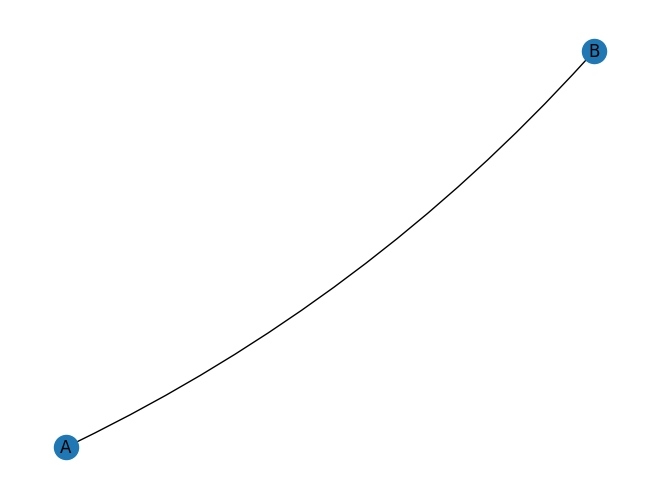

In [179]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph() #or G = nx.MultiDiGraph()
G.add_node('A')
G.add_node('B')
G.add_edge('A', 'B')
G.add_edge('A', 'B')

pos = {'A': (0, 0), 'B': (1, 1)}
nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1', arrowstyle = '-')
edge_labels=dict([((u,v,))
             for u,v,d in G.edges(data=True)])

plt.show()